# 04 - Structural Alignment

## Summary

We have aligned all predictions against each other. We display the results here, studying three different aspects:

- The global TM-score distribution.
- The relationship between sequence identity and TM-score.
- The structural clustering of Nitrogenases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
plt.rcParams['svg.fonttype'] = 'none'

In [20]:
tmscore_all_extant = pd.read_csv(
    '../data/ddkk-tm-score.csv', sep='\s+', header=None, 
    names=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
)
tmscore_all_extant['pdb1'] = tmscore_all_extant['pdb1'].apply(lambda x: x.split('.')[0])
tmscore_all_extant['pdb2'] = tmscore_all_extant['pdb2'].apply(lambda x: x.split('.')[0])

**Figure 1**: Distribution of TM-scores across the DDKK all-vs-all structural alignment.

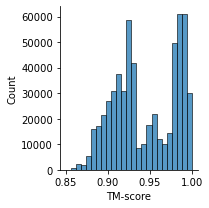

In [4]:
g = sns.displot(
    data=tmscore_all_extant, x='tm-score2', height=3, aspect=1.0, bins=25
)
g.set_xlabels('TM-score')
g.savefig('../figures/ddkk-histogram-tmscore.svg')
g.savefig('../figures/ddkk-histogram-tmscore.png', dpi=300)

**Figure 2**: Distribution of RMSD across the DDKK all-vs-all structural alignment.

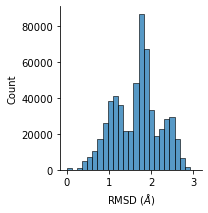

In [43]:
g = sns.displot(
    data=tmscore_all_extant, x='rmsd', height=3, aspect=1.0, bins=25
)
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/ddkk-histogram-rmsd.svg')
g.savefig('../figures/ddkk-histogram-rmsd.png', dpi=300)

**Figure 3**: Joint distribution of TM-score (x-axis) and sequence identity (y-axis)

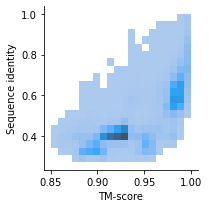

In [7]:
g = sns.displot(y='idali', x='tm-score2', data=tmscore_all_extant, height=3, bins=20)
g.set_ylabels('Sequence identity')
g.set_xlabels('TM-score')
g.savefig('../figures/ddkk-histogram2D-tmscore-idali.svg')
g.savefig('../figures/ddkk-histogram2D-tmscore-idali.png', dpi=300)

**Figure 4**: Joint distribution of RMSD (x-axis) and sequence identity (y-axis)

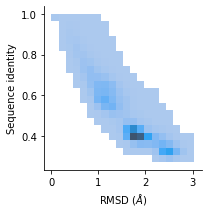

In [42]:
g = sns.displot(y='idali', x='rmsd', data=tmscore_all_extant, height=3, bins=20)
g.set_ylabels('Sequence identity')
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/ddkk-histogram2D-rmsd-idali.svg')
g.savefig('../figures/ddkk-histogram2D-rmsd-idali.png', dpi=300)

To study the clustering, we will start by considering hierarchical clustering, generated by the clustermap method. First, we need to pivot the table.

In [21]:
tmscore_all_extant_matrix = tmscore_all_extant.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()
tmscore_all_extant_matrix

**Figure 5**: DDKK-structural alignment clustermap, based on TM-scores. Each point of the matrix represents the alignment of a protein against another protein.

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


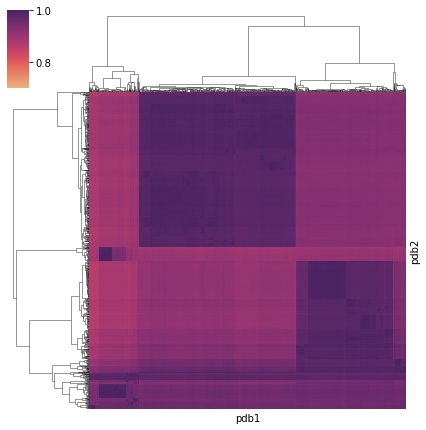

In [23]:
tmscore_all_extant_matrix = tmscore_all_extant.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()
g = sns.clustermap(
    data=tmscore_all_extant_matrix, figsize=(6, 6), col_cluster=True, cmap='flare', vmin=0.7, xticklabels=False, yticklabels=False
)
g.savefig('../figures/ddkk-clustermap-tmscore.svg')
g.savefig('../figures/ddkk-clustermap-tmscore.png', dpi=300)

**Figure 6**: DDKK-structural alignment clustermap, based on RMSD. Each point of the matrix represents the alignment of a protein against another protein.

/home/bcz/miniconda3/envs/bst/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


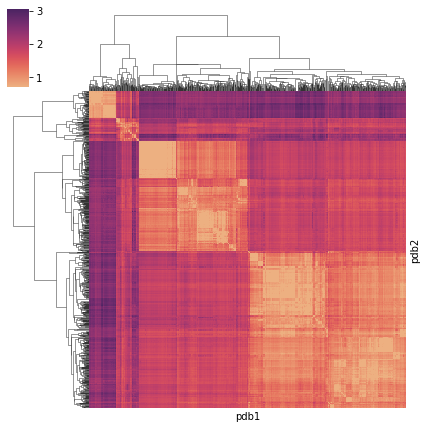

In [44]:
tmscore_all_extant_matrix = tmscore_all_extant.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='rmsd').dropna()
g = sns.clustermap(
    data=tmscore_all_extant_matrix, figsize=(6, 6), col_cluster=True, cmap='flare', vmin=0.7, xticklabels=False, yticklabels=False
)
g.savefig('../figures/ddkk-clustermap-rmsd.svg')
g.savefig('../figures/ddkk-clustermap-rmsd.png', dpi=300)

Let's check the most-disimilar pairs.

In [45]:
tmscore_all_extant.sort_values(by='rmsd', ascending=True)

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
180558,nsdb-000220,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
180415,nsdb-000077,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
180341,nsdb-000003,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
179804,nsdb-000235,nsdb-000235,1.0000,1.0000,0.00,1.000,1.000,1.000,1977,1977,1977
...,...,...,...,...,...,...,...,...,...,...,...
67264,nsdb-000363,nsdb-000088,0.9409,0.8827,3.01,0.301,0.282,0.305,1848,1974,1820
277336,nsdb-000088,nsdb-000363,0.8827,0.9409,3.01,0.282,0.301,0.305,1974,1848,1820
412293,nsdb-000470,nsdb-000538,0.8829,0.9412,3.01,0.301,0.321,0.326,1974,1848,1820
544069,nsdb-000237,nsdb-000713,0.8506,0.9444,3.04,0.343,0.382,0.387,2009,1804,1781


For the remaining part of the analysis, we will consider the network emerging from generating edges above a given threshold.

In [69]:
number_clusters = []

for threshold in np.arange(0.25, 3.0, 0.25):
    G = nx.Graph()
    for i, row in tmscore_all_extant.iterrows():
        if row['rmsd'] < threshold:
            G.add_edge(row.pdb1, row.pdb2)
    number_clusters.append(
        dict(
            threshold=threshold, 
            n_clusters=nx.number_connected_components(G),
            n_edges=nx.number_of_edges(G),
            clustering=nx.average_clustering(G)
            
        )
    )

In [70]:
number_clusters = pd.DataFrame.from_records(number_clusters)

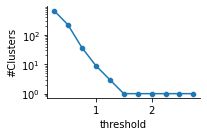

In [71]:
g = sns.relplot(x='threshold', y='n_clusters', data=number_clusters, kind='line', height=2.0, aspect=1.5 )
g.map(sns.scatterplot, 'threshold', 'n_clusters', data=number_clusters)
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Clusters')
g.savefig('../figures/ddkk.replot-threshold-nclusters.svg')
g.savefig('../figures/ddkk.replot-threshold-nclusters.png', dpi=300)

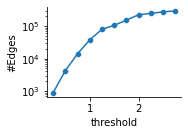

In [73]:
g = sns.relplot(x='threshold', y='n_edges', data=number_clusters, kind='line', height=2.0, aspect=1.5 )
g.map(sns.scatterplot, 'threshold', 'n_edges', data=number_clusters)
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Edges')
g.savefig('../figures/ddkk.replot-threshold-n_edges.svg')
g.savefig('../figures/ddkk.replot-threshold-n_edges.png', dpi=300)

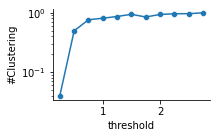

In [75]:
g = sns.relplot(x='threshold', y='clustering', data=number_clusters, kind='line', height=2.0, aspect=1.5 )
g.map(sns.scatterplot, 'threshold', 'clustering', data=number_clusters)
g.axes[0, 0].set_yscale('log')
g.set_ylabels('#Clustering')
g.savefig('../figures/ddkk.replot-threshold-clustering.svg')
g.savefig('../figures/ddkk.replot-threshold-clustering.png', dpi=300)

In [66]:
tmscore_all_extant

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
1,nsdb-000002,nsdb-000001,0.9790,0.9869,1.35,0.596,0.601,0.603,1990,1974,1966
2,nsdb-000003,nsdb-000001,0.9882,0.9912,0.96,0.633,0.635,0.638,1980,1974,1966
3,nsdb-000004,nsdb-000001,0.9934,0.9889,1.02,0.645,0.642,0.646,1965,1974,1962
4,nsdb-000005,nsdb-000001,0.9106,0.9243,1.92,0.344,0.350,0.372,2004,1974,1856
...,...,...,...,...,...,...,...,...,...,...,...
587661,nsdb-000765,nsdb-000769,0.9031,0.9278,1.79,0.364,0.374,0.397,2010,1956,1842
587662,nsdb-000766,nsdb-000769,0.9651,0.8918,1.69,0.457,0.422,0.467,1806,1956,1768
587663,nsdb-000767,nsdb-000769,0.9411,0.9268,1.59,0.382,0.376,0.401,1926,1956,1834
587664,nsdb-000768,nsdb-000769,0.9820,0.9910,1.17,0.573,0.579,0.580,1974,1956,1952
